In [2]:
from rocketpy import Environment, SolidMotor, Rocket, Flight


Gravity Details

Acceleration of gravity at surface level:    9.7991 m/s²
Acceleration of gravity at  78.083 km (ASL): 9.5626 m/s²


Launch Site Details

Launch Date: 2024-12-18 12:00:00 UTC
Launch Site Latitude: 37.10478°
Launch Site Longitude: -6.73604°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 167973.95 W    4113031.36 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 25.9 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.083 km
Forecast Time Period: from 2024-12-17 00:00:00 to 2025-01-02 00:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 0.76 m/s
Surface Wind Direction: 45.15°
Surface Wind Heading: 225.15°
Surface Pressure: 1000.00 hPa
Surface Temperature: 288.24 K
Surface Air Density: 1.209 kg/m³
Surface Speed of Sound: 340.35 m/s


Earth Model Details

Earth Radius at Launch sit

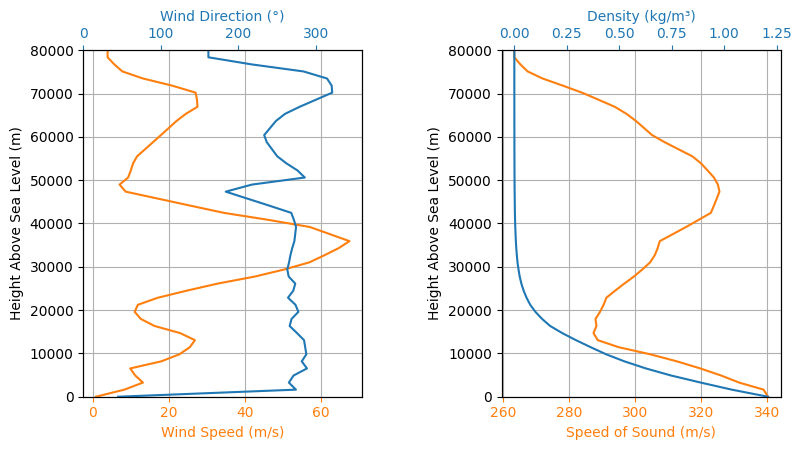

In [3]:
env = Environment(latitude=37.10477546247253, longitude=-6.736040262580387, elevation=0) # INTA Spaceport near Sevilla

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

env.set_atmospheric_model(type="Forecast", file="GFS")

env.info()

Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 5 s
Total Propellant Mass: 2.956 kg
Structural Mass Ratio: 0.380
Average Propellant Exhaust Velocity: 606.446 m/s
Average Thrust: 358.520 N
Maximum Thrust: 1000.0000000000001 N at 0.0 s after ignition.
Total Impulse: 1792.602 Ns



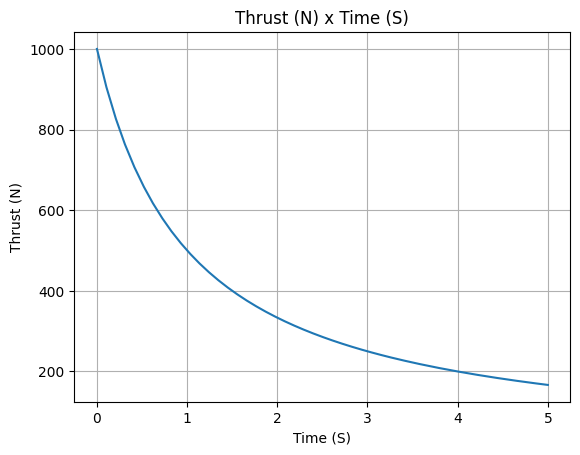

In [55]:
solid_lambda = SolidMotor(
    thrust_source=lambda x: (1 / (x + 1)) * 1000,
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=5,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)
solid_lambda.info()

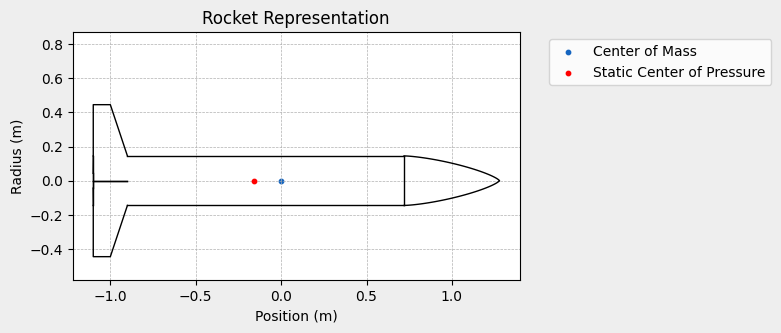

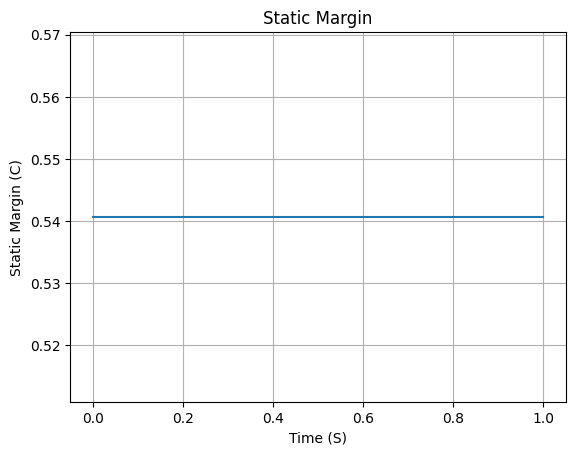

In [98]:
LAUNCH_Ring = Rocket(
    radius=290 / 2000,
    mass=33,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="LAUNCH_Ring_drag.csv",
    power_on_drag="LAUNCH_Ring_drag.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

# LAUNCH_Ring.add_motor(solid_lambda, position=-0.5)

nose_cone = LAUNCH_Ring.add_nose(
    length=0.55829, kind="von karman", position=1.278
)

fin_set = LAUNCH_Ring.add_trapezoidal_fins(
    n=4,
    root_chord=0.2,
    tip_chord=0.1,
    span=0.3,
    position=-0.9,
    cant_angle=0.0,
    airfoil=("xf-naca0008-il-50000.csv","degrees"),
)

tail = LAUNCH_Ring.add_tail(
    top_radius=290/2000, bottom_radius=0.0435, length=0.001, position=-1.1
)

LAUNCH_Ring.draw()
LAUNCH_Ring.plots.static_margin()

In [99]:
payload_flight = Flight(
    rocket=LAUNCH_Ring,
    environment=env,
    rail_length=5.2,  # does not matter since the flight is starting at apogee
    inclination=0,
    heading=0,
    initial_solution=[
        0,
        16000, 0, 27000,
        200, 0, 0,
        0.710, -0.704, 0, 0,
        0, 0, 0
    ],
    name="LR_Flight",
)

In [100]:
payload_flight.prints.initial_conditions()
payload_flight.prints.impact_conditions()
payload_flight.prints.maximum_values()


Initial Conditions

Initial time: 0.000 s
Position - x: 16000.00 m | y: 0.00 m | z: 27000.00 m
Velocity - Vx: 200.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.710 | e1: -0.704 | e2: 0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -89.50° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 0.861 c

Impact Conditions

Time of impact: 106.554 s
X impact: 27990.749 m
Y impact: -135.272 m
Altitude impact: 25.898 m (ASL) | 0.000 m (AGL) 
Latitude: 37.1031405°
Longitude: -6.4203849°
Vertical velocity at impact: -213.194 m/s
Number of parachutes triggered until impact: 0

Maximum Values

Maximum Speed: 387.368 m/s at 48.09 s
Maximum Mach Number: 1.327 Mach at 47.61 s
Maximum Reynolds Number: 4.252e+06 at 105.44 s
Maximum Dynamic Pressure: 2.849e+04 Pa at 105.34 s
Maximum Acceleration During Motor Burn: 11.885 m/s² at 0.00 s
Maximum Gs During Motor Burn: 1.212 g at 0.00 s
Maximum Acceleration A

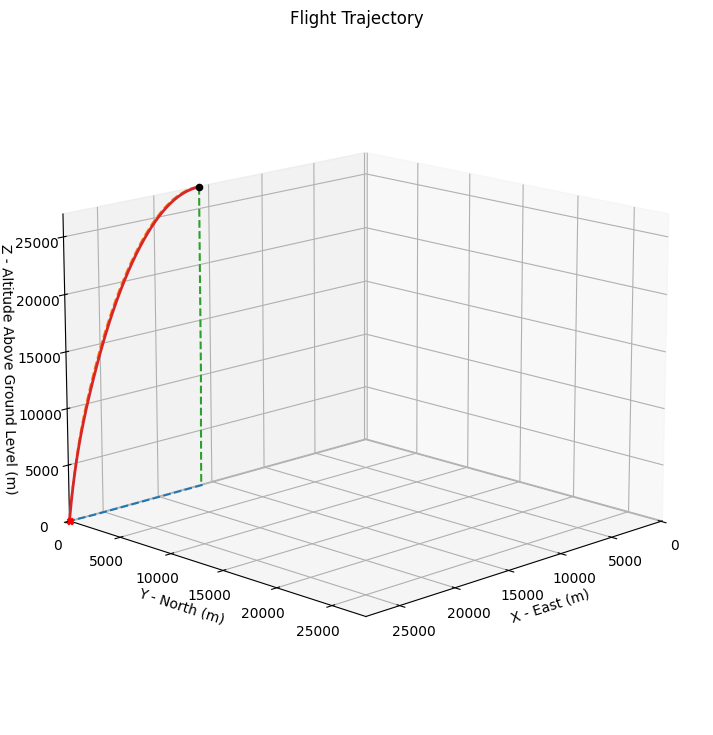

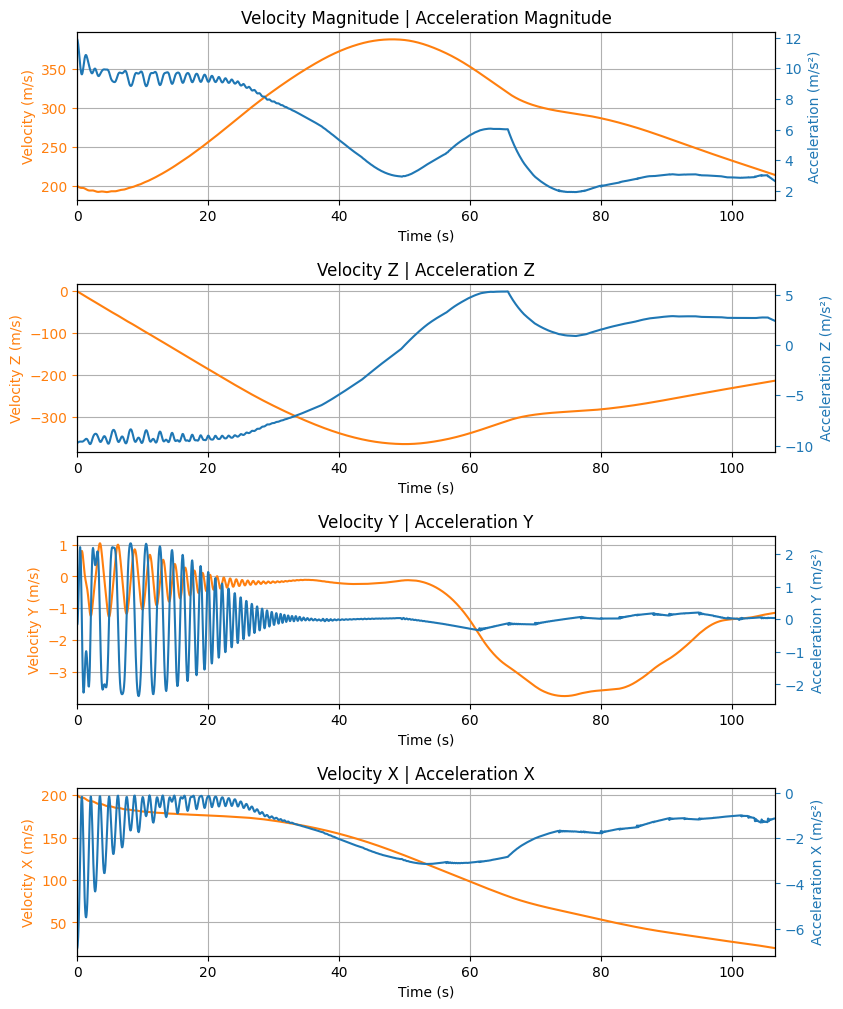

In [102]:
payload_flight.plots.trajectory_3d()
payload_flight.plots.linear_kinematics_data()
payload_flight.plots.aerodynamic_forces()